# Late Fusion Transformer Model - CMU-MOSEI Dataset

In [ ]:
!git clone https://github.com/M-Jafarkhani/Multimodal-Emotion-Recognition

In [2]:
import gdown

file_id = "180l4pN6XAv8-OAYQ6OrMheFUMwtqUWbz"
destination = "mosei_senti_data.pkl"

gdown.download(
    f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=180l4pN6XAv8-OAYQ6OrMheFUMwtqUWbz
From (redirected): https://drive.google.com/uc?id=180l4pN6XAv8-OAYQ6OrMheFUMwtqUWbz&confirm=t&uuid=aae96df3-e68d-4ebf-836f-c1774ad88973
To: /content/mosei_senti_data.pkl
100%|██████████| 3.73G/3.73G [00:25<00:00, 148MB/s]


'mosei_senti_data.pkl'

## Importing Libraries

In [3]:
import sys
import torch
import matplotlib.pyplot as plt

sys.path.append('/content/Multimodal-Emotion-Recognition/src')

## Importing Helper Functions

In [4]:
from loader import get_dataloader
from unimodals.modules import Transformer, MLP
from training.supervised import train, test
from fusions.modules import Concat
from utils import get_default_device, save_results

## Loading the Dataset

In [5]:
FILE_PATH = '/content/mosei_senti_data.pkl'
train_data, valid_data, test_data = get_dataloader(FILE_PATH)

In [6]:
device = get_default_device()
print(device)

cuda


## Model Architecture

In [7]:
encoders = [
    Transformer(35, 40).to(device),
    Transformer(74, 10).to(device),
    Transformer(300, 600).to(device),
]
head = MLP(650, 256, 1).to(device)
fusion = Concat().to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


## Training

In [8]:
OUTPUT_MODEL_FILE_NAME = "MOSEI_Late_Fusion_Transformer"
train_losses, valid_losses = train(
    encoders,
    fusion,
    head,
    train_data,
    valid_data,
    100,
    task="regression",
    optimtype=torch.optim.AdamW,
    early_stop=False,
    is_packed=True,
    lr=1e-4,
    save=f'/content/{OUTPUT_MODEL_FILE_NAME}.pt',
    weight_decay=0.01,
    objective=torch.nn.L1Loss(),
)


Epoch [1/100]
Train Loss: 0.7196
Valid Loss: 0.6709
Saving Best

Epoch [2/100]
Train Loss: 0.6486
Valid Loss: 0.6496
Saving Best

Epoch [3/100]
Train Loss: 0.6252
Valid Loss: 0.6197
Saving Best

Epoch [4/100]
Train Loss: 0.6074
Valid Loss: 0.6355

Epoch [5/100]
Train Loss: 0.5895
Valid Loss: 0.6135
Saving Best

Epoch [6/100]
Train Loss: 0.5745
Valid Loss: 0.6163

Epoch [7/100]
Train Loss: 0.5597
Valid Loss: 0.6392

Epoch [8/100]
Train Loss: 0.5419
Valid Loss: 0.6386

Epoch [9/100]
Train Loss: 0.5245
Valid Loss: 0.6078
Saving Best

Epoch [10/100]
Train Loss: 0.5095
Valid Loss: 0.6275

Epoch [11/100]
Train Loss: 0.5007
Valid Loss: 0.6251

Epoch [12/100]
Train Loss: 0.4811
Valid Loss: 0.6436

Epoch [13/100]
Train Loss: 0.4601
Valid Loss: 0.6386

Epoch [14/100]
Train Loss: 0.4463
Valid Loss: 0.6361

Epoch [15/100]
Train Loss: 0.4339
Valid Loss: 0.6240

Epoch [16/100]
Train Loss: 0.4260
Valid Loss: 0.6219

Epoch [17/100]
Train Loss: 0.4105
Valid Loss: 0.6219

Epoch [18/100]
Train Loss: 0.39

Text(0.5, 1.0, 'Loss vs. No. of epochs')

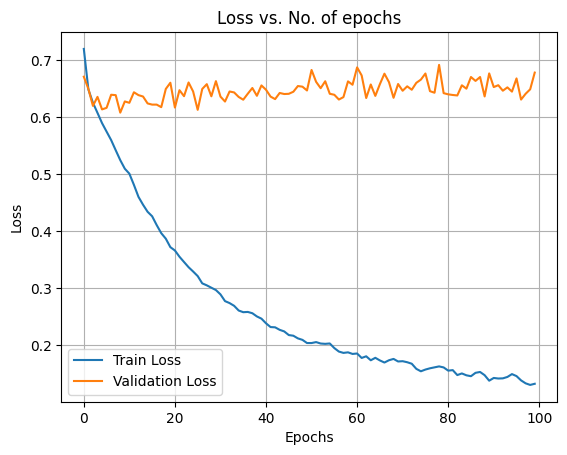

In [9]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [10]:
save_results(train_losses, valid_losses, f'/content/{OUTPUT_MODEL_FILE_NAME}.pkl')

## Testing

In [11]:
model = torch.load(f"/content/{OUTPUT_MODEL_FILE_NAME}.pt").to(device)

test(
    model,
    test_dataloaders_all=test_data,
    is_packed=True,
    criterion=torch.nn.L1Loss(),
    task="posneg-classification"
)


<ipython-input-11-ece7b266be51>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(f"/content/{OUTPUT_MODEL_FILE_NAME}.pt").to(device)


Recall: 80.4696% | Total Accuracy: 68.4902%
Inference Time: 4s410ms
Inference Params: 20955023
